In [7]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
from sklearn.linear_model import lasso_path
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Diabetes データの読み込み

糖尿病のデータ：（説明変数：10個，目的変数：血糖値）

In [8]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

print(X.shape)
print(y.shape)

(442, 10)
(442,)


## Lassoの解パスの描写

lasso_pathを利用

Computing regularization path using the lasso...


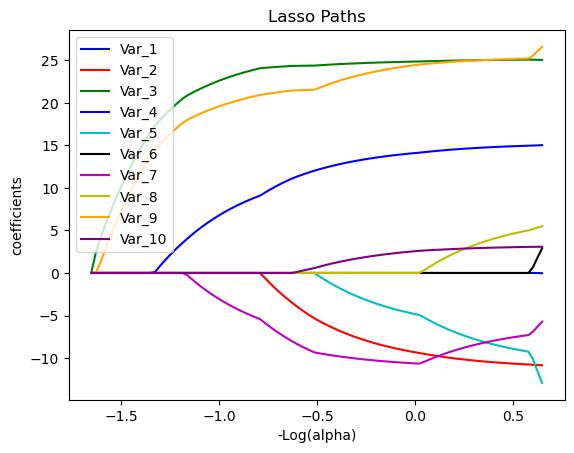

In [9]:
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

plt.figure(1)
colors = cycle(["b", "r", "g", "b", "c", "k", "m", "y", "orange", "purple"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for i, (coef_l, c) in enumerate(zip(coefs_lasso, colors)):
    plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=f"Var_{i+1}")

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso Paths")
plt.legend()
plt.show()

# 交差確認法でLassoの最適なパラメータを探索（Grid Search）

最適な正則化パラメータ (alpha): 0.0811
交差検証による最高の平均二乗誤差 (負の値): -2991.8385


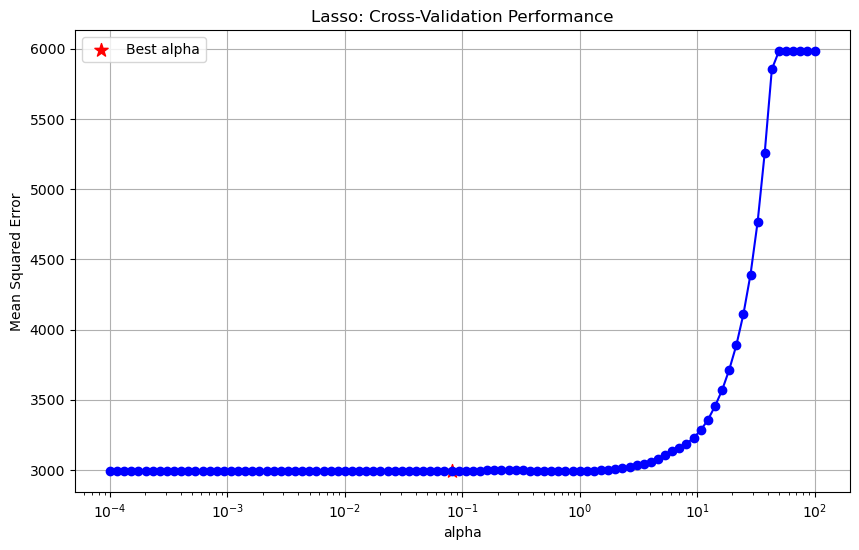

In [10]:
# 2. Lassoモデルの準備
lasso = Lasso()

# 3. 交差検証で探索するパラメータの範囲を設定
# np.logspaceを使って、広範囲のalphaの候補を作成します
param_grid = {'alpha': np.logspace(-4, 2, 100)}

# 4. GridSearchCVによる交差検証の実行
# cv=5 は5分割交差検証を意味します
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# 5. 最適なパラメータとスコアの表示
print(f"最適な正則化パラメータ (alpha): {grid_search.best_params_['alpha']:.4f}")
print(f"交差検証による最高の平均二乗誤差 (負の値): {grid_search.best_score_:.4f}")

# 6. 最適なモデルの取得
best_lasso = grid_search.best_estimator_

# 7. alphaの値と交差検証スコアの関係をプロット
results = grid_search.cv_results_
alphas = results['param_alpha'].data
mean_scores = -results['mean_test_score']  # GridSearchCVは負の値を返すため、正の値に戻します

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_scores, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso: Cross-Validation Performance')
plt.grid(True)
plt.scatter(grid_search.best_params_['alpha'], -grid_search.best_score_, color='red', s=100, marker='*', label='Best alpha')
plt.legend()
plt.show()